# Random Forest 아니면 XGBoost? 이제는 LCE를 살펴봐야 할 시간입니다

출처: [https://towardsdatascience.com/random-forest-or-xgboost-it-is-time-to-explore-lce-2fed913eafb8](https://towardsdatascience.com/random-forest-or-xgboost-it-is-time-to-explore-lce-2fed913eafb8)

# Random Forest or XGBoost? It is Time to Explore LCE
**LCE: Local Cascade Ensemble**

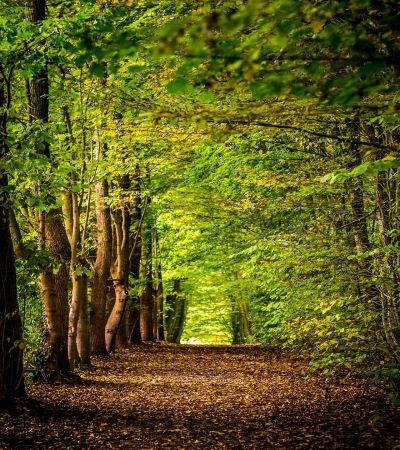

지난 몇 년 동안, Random Forest와 XGBoost는 분류 및 회귀의 많은 문제를 해결하는 데 있어 최고의 기계 학습 방법으로 부상했습니다. 하지만, 실무자는 반복되는 질문에 직면해 있습니다. '주어진 데이터 세트에 대해 어떤 모델을 선택해야 할까요?'

**Local Cascade Ensemble (LCE)** [Fauvel et al., 2022]는 이 질문에 답하기 위해 제안하는 새로운 machine learning 방법입니다. LCE는 RandomForest와 XGBoost의 장점을 결합하고, 더 나은 일반화 predictor를 얻기 위해 상호 보완적인 diversification approach를 채택합니다. 따라서, LCE는 Random Forest와 XGBoost의 예측 성능을 더욱 향상시킵니다.

이 아티클은 몇 가지 코드 예제와 함께 LCE와 해당 Python 패키지를 제공합니다. LCE 패키지는 scikit-learn과 호환됩니다. 따라서, scikit-learn pipeline 및 model selection tools와 상호 작용할 수 있습니다.

# LCE Presentation
앙상블 방법의 구성에는 정확하고 다양한 개별 predictors를 결합하는 작업이 포함됩니다. 다양한 predictors를 생성하는 두 가지 상호 보완적인 방법이 있습니다. $(i)$ training 데이터 분포를 변경하고 $(ii)$ training 데이터의 다른 부분을 학습하는 것입니다.

LCE를 개발하기 위해 이 두 가지 diversifiacation approaches를 채택했습니다. 첫째, $(i)$ LCE는 bias-variance trade-off에 대한 상호 보완적 효과와 함께 원래 훈련 데이터의 분포를 수정하는 잘 알려진 두 가지 방법인 bagging(variance 감소)과 boosting (bias 감소)을 결합입니다. 그런 다음 $(ii)$ LCE는 훈련 데이터의 다른 부분을 학습하여 분할 정복 전략(decision tree)을 기반으로 전역적으로 발견할 수 없는 새로운 관계를 포착합니다. LCE가 이러한 방법을 어떻게 결합하는지 자세히 설명하기 전에, 여기서는 LCE의 설명에 사용될 그 뒤에 있는 핵심 개념을 소개합니다.

bias-variance trade-off는 학습 알고리즘이 훈련 세트를 넘어 일반화할 수 있는 능력을 정의합니다. bias는 학습 알고리즘의 시스템 오류로 인해 발생하는 예측 오류의 구성 요소입니다. bias가 높다는 것은 학습 알고리즘이 훈련 세트의 기본 구조(underfitting)를 담아낼 수 없다는 것을 의미합니다. variance은 훈련 세트의 변화에 대한 학습 알고리즘의 민감도를 측정합니다. variance가 높다는 것은 알고리즘이 훈련 세트를 너무 과도하게 학습하고 있음을 의미합니다(overfitting). 목표는 bias와 variance를 모두 최소화하는 것입니다. bagging은 variance 감소에 주요 영향을 미칩니다. 여러 버전의 predictor(bootstrap replicates)를 생성하고 이를 사용하여 집계된 predictor를 얻는 방법입니다. bagging을 사용하는 현재의 SOTA는 Random Forest입니다. 반면, boosting은 bias 감소에 주요 효과가 있습니다. weak predictor를 반복적으로 학습하고 추가하여 최종적으로 strong predictor를 만드는 방법입니다. weak learner가 추가된 후, 데이터 weights가 재조정되어 미래의 weak learner가 이전의 weak learner가 잘못 예측한 example에 더 집중할 수 있습니다. boosting의 현재 SOTA는 XGBoost입니다. Figure 1은 bagging과 boosting 방법의 차이점을 보여줍니다.

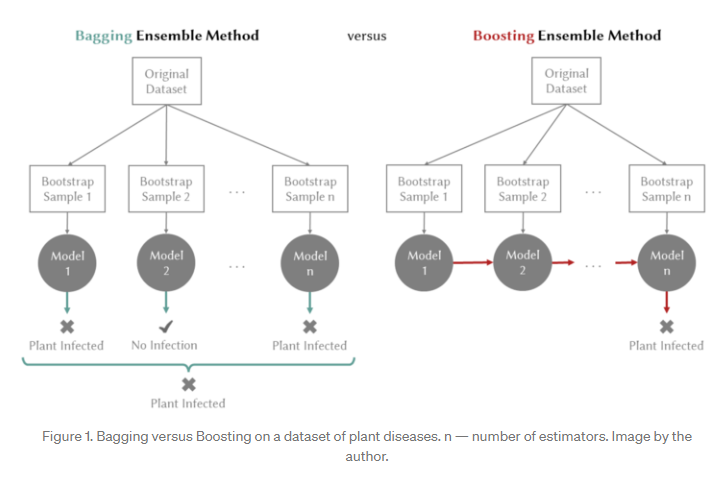

따라서, 새로운 앙상블 방법 LCE는 machine learning 모델이 직면한 bias-variance trade-off를 처리하기 위해 boosting-bagging 접근 방식을 결합합니다. 또한, 분할 정복 방식을 채택하여 훈련 데이터의 다른 부분에 대한 predictor 오류를 개별화합니다. LCE는 Figure 2에 나와 있습니다.

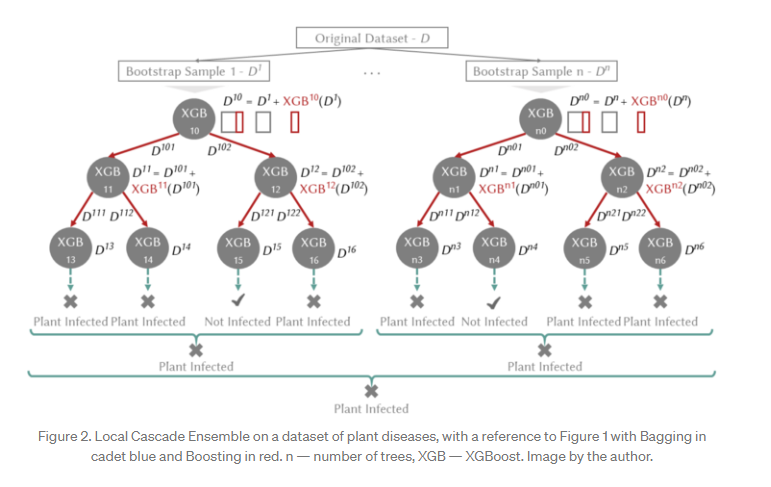

특히, LCE는 cascade generalization을 기반으로 합니다. cascade generalization은 predictors 세트를 순차적으로 사용하고 각 단계에서 input 데이터 세트에 새 attributes를 추가합니다. 새 attributes는 base learner라고 하는 predictor(예: classifier에 대한 class 확률)가 제공하는 output에서 파생됩니다. LCE는 분할 정복 전략(decision tree)에 따라 지역적으로 cascade generalization을 적용하고 boosting 기반 predictor를 base learner로 사용하여 decision tree 전반에 걸쳐 bias를 줄입니다. 현재 SOTA boosting 알고리즘이 base learner로 채택되었습니다(XGBoost). tree를 키울 때, boosting은 각 decision node에서 base learner의 output을 데이터 세트에 새 attributes로 추가하여 tree 아래로 전파합니다(예: Figure 2의 $XGB^{10}(D^1)$). prediction outputs는 base learner가 sample을 정확하게 예측하는 능력을 나타냅니다. 다음 tree level에서 데이터 세트에 추가된 outputs은 base learner가 이전에 잘못 예측한 sample에 더 집중하기 위한 weighting scheme으로 활용됩니다. 그런 다음, boosted decision tree에 의해 생성된 overfitting은 bagging을 사용하여 완화됩니다. bagging은 원본 데이터 세트(예: Figure 2의 $D^1,\, D^2$)를 대체하여 random sampling에서 여러 predictors를 생성하여 variance 감소를 제공합니다. 마지막으로 tree는 단순 과반 투표로 집계됩니다. LCE는 predictor로 적용하기 위해 base learner에서 생성한 모델을 각 node에 저장합니다.

# Missing Data
기본적으로 missing data를 처리하기로 선택했습니다. XGBoost와 유사하게, LCE는 분할에 대한 missing values를 제외하고, block propagation을 사용합니다. node split 동안, block propagation은 missing data가 있는 모든 sample을 errors가 적은 decision node 측에 보냅니다.

# Hyperparameters
LCE의 hyperparameter는 tree-based learning에서 익숙한 것들입니다. 또한, LCE는 tree의 각 노드에서 특정 XGBoost 모델을 학습하며, XGBoost hyperparameter 범위만 지정하면 됩니다. 그런 다음, 각 XGBoost 모델의 hyperparameter는 tree of Parzen estimators algorithm을 사용한 sequential model-based optimization인 Hyperopt [Bergstra et al., 2011]에 의해 자동으로 설정됩니다. Hyperopt는 이전 선택과 tree-based optmization algorithm에서 다음 hyperparameter를 선택합니다. Tree of Parzen estimators는 hyperparameter 설정에 대한 grid search 및 random search 성능과 비슷하거나 능가합니다. LCE hyperparameter의 전체 목록은 해당 [documentation](https://lce.readthedocs.io/en/latest/api.html)에서 확인할 수 있습니다. ```max_depth max_features n_estimators```

# Published Results
처음에 [Fauvel et al., 2019]에서 특정 application을 위해 LCE를 설계한 다음  [Fauvel et al., 2022]에서 공개 UCI 데이터 세트 [Dua and Graff, 2017]에서 평가했습니다. 결과는 LCE가 Random Forest 및 XGBoost를 포함한 최신 classifier보다 평균적으로 더 나은 예측 performance를 얻음을 보여줍니다.

# Python Package and Code Examples

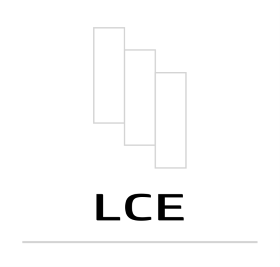

## Installation

```pip```

```python
pip install lcensemble
````

```conda```

```python
conda install -c conda-forge lcensemble
```

## Code Examples
LCE 패키지는 scikit-learn과 호환됩니다. LCE 패키지는 check_estimator를 통과합니다. 따라서, scikit-learn pipelines 및 model selection tools와 상호 작용할 수 있습니다. 다음 예는 분류 및 회귀 작업을 위해 공개 데이터 세트에서 LCE를 사용하는 방법을 보여줍니다. missing values를 포함하는 데이터 세트의 LCE 예도 설명합니다.

- Classification with LCE on the Iris dataset

In [3]:
from lce import LCEClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    random_state=0)

clf = LCEClassifier(n_jobs=-1, random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [7]:
print(cross_val_score(clf, data.data, data.target, cv=3))

[0.98 0.94 0.96]


- Classification with LCE on the Iris Dataset with missing values

이 예는 missing values에 대한 LCE의 robustness을 보여줍니다. Iris train set는 variable당 missing values를 20% 포함하는 것으로 수정됩니다.

In [8]:
import numpy as np
from lce import LCEClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [9]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    random_state=0)

np.random.seed(0)
m = 0.2
for j in range(0, X_train.shape[1]):
    sub = np.random.choice(X_train.shape[0], int(X_train.shape[0] * m))
    X_train[sub, j] = np.nan
    
clf = LCEClassifier(n_jobs=-1, random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



- Regression with LCE on the Diabetes dataset

마지막으로, LCE가 회귀 문제에서도 사용할 수 있음을 보여줍니다.

In [10]:
from lce import LCERegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    random_state=0)

reg = LCERegressor(n_jobs=-1, random_state=123)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.0f}".format(mse))

The mean squared error (MSE) on test set: 3576


# Conclusion
이 아티클에서는 일반적인 분류 및 회귀 작업을 위한 새로운 앙상블 방법인 LCE와 해당 Python 패키지를 소개합니다. LCE에 대한 자세한 내용은 Data Mining and Knowledge Discovery 저널에 게재된 관련 [논문](https://hal.inria.fr/hal-03599214/document)을 참조하세요.